In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [13]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Assume X is your feature matrix and y is the target variable

# Step 1: Initialize the linear regression model
model = LinearRegression()


# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(model, n_features_to_select=20)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)

# Step 5: Train the linear regression model on the selected features
model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = model.predict(X_rfe)

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Mean Squared Error (MSE): 9.010613039366914e-30
Root Mean Squared Error (RMSE): 3.0017683187359602e-15
Mean Absolute Error (MAE): 2.843404524178873e-15


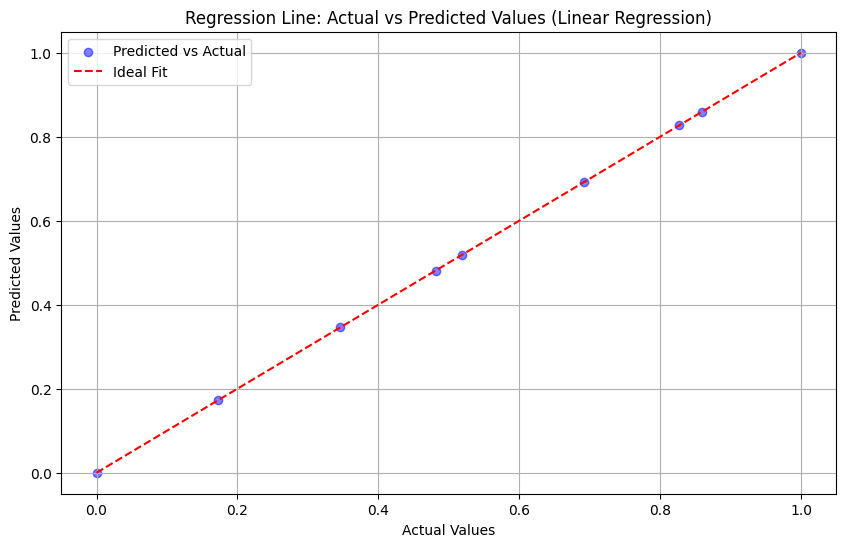

In [10]:
import matplotlib.pyplot as plt

# Plot regression line (Actual vs. Predicted values)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal fit line (where predicted = actual)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line: Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()
